# Exploratory Data Analysis on Haberman Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas.util.testing as tm


#Load into a pandas dataFrame.
hm = pd.read_excel("/content/ANZ synthesised transaction dataset.xlsx")
hm.head()


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# (Q) how many data-points and features?
print (hm.shape)

(12043, 23)


In [4]:
hm.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [5]:
#(Q) What are the column names in our dataset?
print (hm.columns)

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


In [6]:
#(Q) How many data points for each class are present? 
#(or) How many people for each age are present?

hm["age"].value_counts().head()
# balanced-dataset vs imbalanced datasets
#hm is a imbalanced dataset as the number of data points for every class varies.

26    893
38    767
20    765
21    733
24    732
Name: age, dtype: int64

In [7]:
hm["country"].value_counts().head()
#number of country present 

Australia    12043
Name: country, dtype: int64

# Scatter Plot

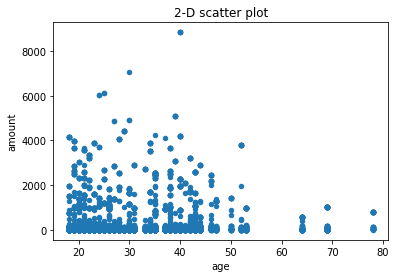

In [11]:
#


hm.plot(kind='scatter', x='age', y='amount') ;
plt.title('2-D scatter plot')

plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-year/age.

# Observation: Younger people spend more money

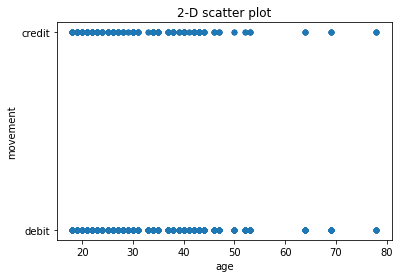

In [12]:
#


hm.plot(kind='scatter', x='age', y='movement') ;
plt.title('2-D scatter plot')

plt.show()

# Observations: Younger people use more credit and debit cards

# Histogram

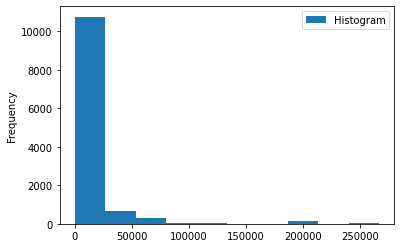

In [21]:
hm.plot(kind ="hist", x="amount", y= "balance" ,label ='Histogram')


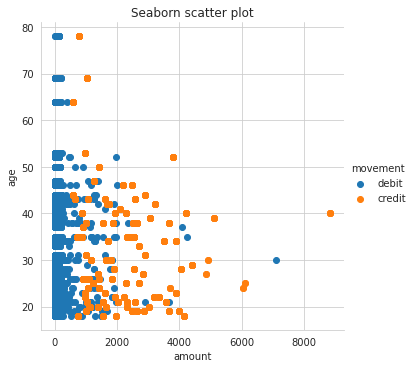

In [24]:
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(hm, hue="movement", height=5) \
   .map(plt.scatter, "amount", "age") \
   .add_legend();
plt.title('Seaborn scatter plot')

   
plt.show();


**Observation(s):**
1. More money spent by debit card

# Box plot and Whiskers

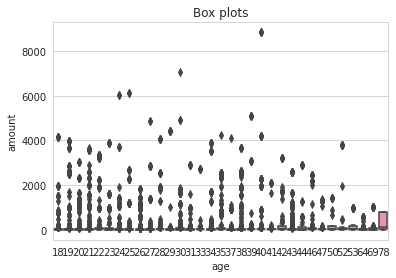

In [27]:
sns.boxplot(x='age',y='amount', data=hm)
plt.title('Box plots')

plt.show()

**Observation :**
1. between age 30 to 45 people send more money


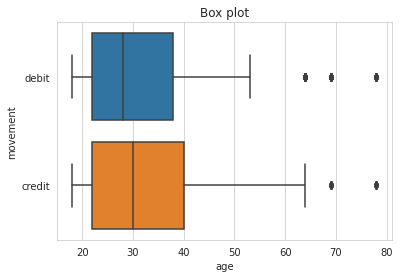

In [29]:
sns.boxplot(x='age', y='movement', data=hm)
plt.title('Box plot')


plt.show()

**Observation:**
1. People elder than 35 use more credit cards


# Violin plots

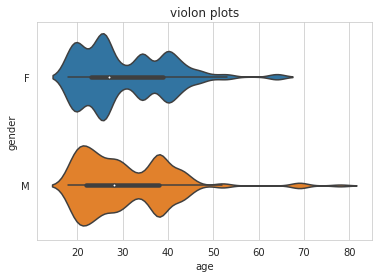

In [33]:
sns.violinplot(x="age", y="gender", data=hm, size=8, split = True)
plt.title('violon plots')

plt.show()

# Observation: Male people are more shopping of older age too

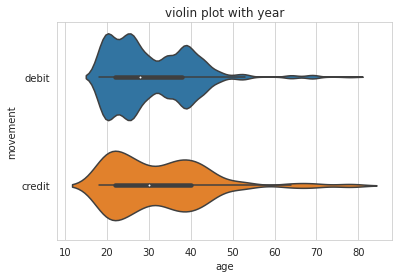

In [32]:
sns.violinplot(x='age', y='movement', data=hm , size=20 , split =True)
plt.title('violin plot with year')
plt.show()

**Observations :**
1. Younger females use more debit cards.

# Multivariate probability density, contour plot.


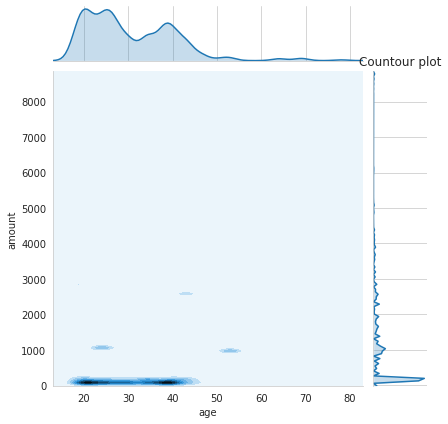

In [38]:
#2D Density plot, contors-plot

sns.jointplot(x="age", y="amount", data=hm, kind="kde");
plt.title('Countour plot' , loc='center')
plt.show();


# Summary : 

1. Younger females use more debit cards.
2. People elder than 35 use more credit cards
3. Between age 30 to 45 people send more money
4. Younger people use more credit and debit cards